### Simple Linear Regression
Simple linear regression is a statistical method used to model the relationship between two quantitative variables. It is one of the most basic and commonly used types of predictive analysis. The two main components in simple linear regression are:

1. **Independent Variable (Predictor):** This is the variable that you use to make predictions. It is assumed to be the cause or the input which influences the dependent variable.

2. **Dependent Variable (Outcome):** This is the variable that you try to predict or explain. It is assumed to be affected by the independent variable.

The goal of simple linear regression is to find a linear relationship between these two variables. This relationship is often represented as a straight line, known as the regression line, which can be written in the basic form:
$$
Y = \beta_0 + \beta_1X + \epsilon \
$$
Here:
- 𝛽0 is the dependent variable and is the intercept of the line on the Y-axis.
- 𝛽1 is the independent variable is the slope of the line

- 𝜖  represents the error term, accounting for the variability in \( Y \) that cannot be explained by the linear relationship with \(X\).

### Steps in Simple Linear Regression

**1. Model Estimation:**
   - You estimate the coefficients 𝛽0 and 𝛽1  using the method of least squares, which minimizes the sum of the squared differences (residuals) between observed values and the values predicted by the model.

**2. Prediction:**
   - Once the model coefficients are estimated, you can use the model to predict values of \( Y \) based on new values of \( X \).

**3. Evaluation:**
   - Assess the model’s effectiveness using metrics like R-squared, which measures the proportion of the variability in \( Y \) that can be explained by \( X \) using your model. Higher R-squared values indicate a better fit of the model to the data.

### Assumptions
Simple linear regression makes several key assumptions:
- **Linearity:** The relationship between \( X \) and \( Y \) is linear.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** The variance of residual is the same for any value of \( X \).
- **Normality:** the residuals (errors), which are the differences between the observed values
and the predicted values from the regression model, should be normally distributed. 






### Method of Ordinary Least Squares

In Ordinary Least Squares (OLS) regression, the coefficients of the linear equation are derived by minimizing the sum of the squares of the residuals, which are the differences between observed values and the values predicted by the model.Here's a brief step-by-step explanation of how these coefficients are derived:

Step 1: Objective Function
The objective of OLS is to minimize the sum of the squared residuals. The sum of the squared residuals can be defined as:

$$
\text{Minimize } S = \sum_{i=1}^n (y_i - \hat{y}_i)^2          
$$

SSR = Sum of Squared Residuals

Step 2: Linear Model
$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$

Step 3: Substituting and Expanding
$$
S = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Step 4: Minimizing S
- For 𝛽0:
$$
\frac{\partial S}{\partial \beta_0} = -2 \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) = 0
$$
- For 𝛽1:
$$
\frac{\partial S}{\partial \beta_1} = -2 \sum_{i=1}^n x_i(y_i - \beta_0 - \beta_1 x_i) = 0
$$

Step 5: Solving the Normal Equations

- For 𝛽1: (slope) is calculated as:
$$
\beta_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}
$$
- For 𝛽0: (intercept) is calculated using:
$$
\beta_0 = \overline{y} - \beta_1 \overline{x}
$$




## Import Libraries and Data Set

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [86]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [88]:
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [90]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [92]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [94]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

# Correlation

In [97]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [99]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [101]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


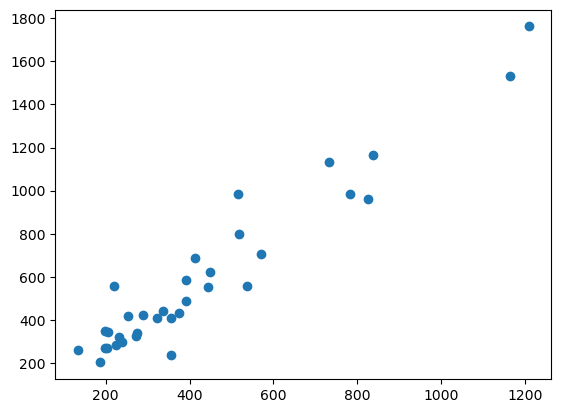

In [103]:
plt.scatter(data1["daily"], data1["sunday"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1db74efc860>,
 'caps': [<matplotlib.lines.Line2D at 0x1db74efcdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db74efc620>],
 'medians': [<matplotlib.lines.Line2D at 0x1db74efd250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db74efd4f0>],
 'means': []}

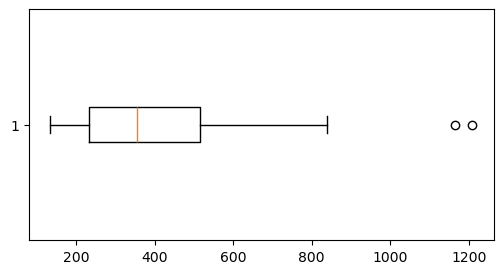

In [105]:
plt.figure(figsize=(6,3))
plt.boxplot(data1["daily"], vert = False)

In [107]:
# import seaborn as sns
#sns.displot(data1['daily'], kde=True)

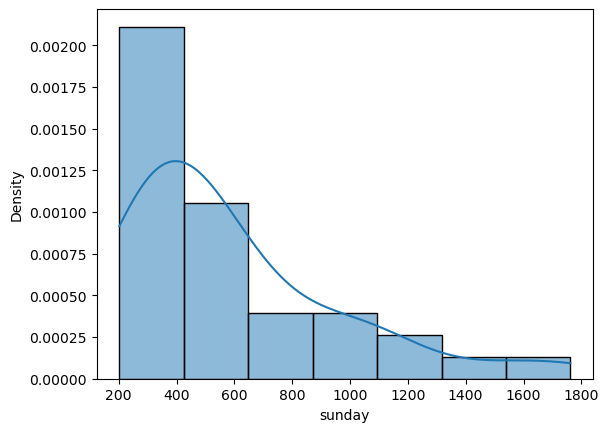

In [109]:
import seaborn as sns
sns.histplot(data1['sunday'], kde = True,stat='density',)
plt.show()

Fitting a Linear Regression Model

In [112]:
# Build regression model

import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data1).fit()

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        09:52:33   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model.summary( ) parameters:

In regression analysis using libraries like `statsmodels` in Python, the `model.summary()` method generates a detailed summary report of the OLS regression results. This summary contains various statistical metrics and information that help in interpreting the performance and reliability of the regression model. Here's a brief explanation of some key parameters you'll typically see in the output of `model.summary()`:

#### 1. **Model Fit Statistics**
   - **R-squared**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R-squared value indicates a better fit of the model.
   - **Adjusted R-squared**: Adjusted for the number of predictors in the model; it is always lower than the R-squared. It provides a more accurate measure by adjusting for the number of terms in the model.
   - **F-statistic**: A measure that tests the overall significance of the model. It compares the variance explained by the model with the variance unexplained, determining if the coefficients are different from zero collectively.
   - **Prob (F-statistic)**: The p-value corresponding to the F-statistic. A low value (typically <0.05) indicates that the model is statistically significant.

#### 2. **Coefficients**
   - **coef**: The estimated values of the coefficients for the predictors.
   - **std err**: The standard error of the estimated coefficients, indicating the level of accuracy of the coefficients.
   - **t**: The t-statistic, which is the coefficient divided by its standard error. It tests if the coefficient is significantly different from zero.
   - **P>|t|**: The p-value corresponding to the t-statistic. A p-value less than a chosen significance level (commonly 0.05) suggests that the corresponding coefficient is statistically significant.

#### 3. **Confidence Interval**
   - Displays the 95% confidence interval for the coefficients, giving a range within which the true coefficient is expected to fall with 95% certainty.

#### 4. **Other Diagnostics**
   - **Durbin-Watson**: A test statistic that checks for autocorrelation in the residuals from a regression analysis. Values close to 2 suggest there is no autocorrelation.
   - **Omnibus/Prob(Omnibus)**: A test for the normality of the residuals. A non-significant value (high p-value) suggests that the residuals are normally distributed.
   - **Skew**: A measure of the asymmetry of the data or the residuals.
   - **Kurtosis**: A measure of the shape of the distribution of the residuals.
   - **Jarque-Bera (JB)/Prob(JB)**: Another test of the normality of the residuals. Similar to the Omnibus test, a higher p-value indicates more evidence for the normality of the residuals.
   - **Condition Number**: A measure of the sensitivity of the model's output to its input. High values might indicate multicollinearity or other numerical problems.

These parameters collectively provide comprehensive insights into the model’s performance, the significance of variables, and whether the assumptions of the regression model are being met. Adjusting your model based on these diagnostics can help improve model accuracy and the reliability of inferences drawn from the analysis.

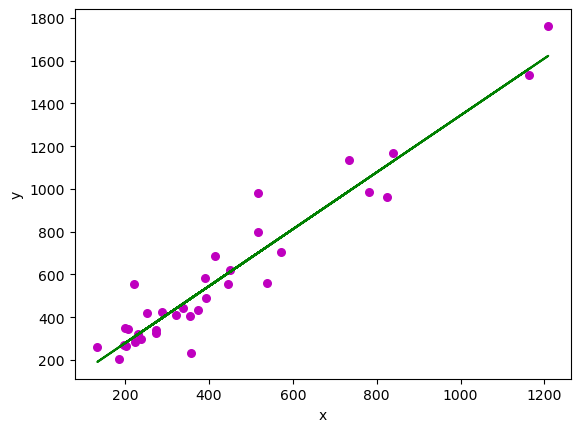

In [117]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 13.84
b1 =1.33
# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

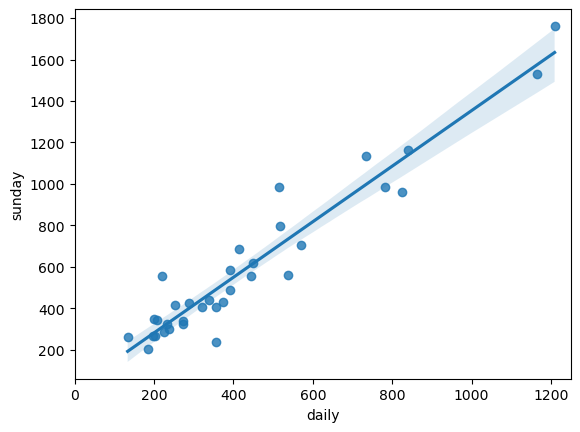

In [119]:
# Plot the linear regression line using seaborn regplot() method
sns.regplot(x="daily", y="sunday", data=data1)
plt.xlim([0,1250])
plt.show()

In [121]:
# import numpy as np
# x = np.arange(10)
# plt.plot(2 + 3 *x)
# plt.show()

In [123]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [125]:
#1100
#(1.3*1164.388)+13.835630

In [127]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    
# print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [129]:
# predict value for 150,240

In [131]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [134]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,1500])

In [136]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [138]:
model.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [140]:
pred = model.predict(data1["daily"])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [142]:
data1["Y_hat"] = pred

In [144]:
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [146]:
data1["residuals"]= data1["sunday"]-data1["Y_hat"]
data1

,Newspaper,daily,sunday,Y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


### Performance Metrics:

Linear regression models are evaluated using various performance metrics to assess the accuracy and efficiency of the model in capturing the relationship between the dependent and independent variables. 

1. **Mean Absolute Error (MAE)**: This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
  $$\text{MAE} = \frac{1}{n} \sum_{i=1}^n \left| y_i - \hat{y}_i \right|$$


2. **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
   $$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$


3. **Root Mean Squared Error (RMSE)**: This is the square root of the mean of the squared errors. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
   $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

4. **R-squared (Coefficient of Determination)**: This metric provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
   $$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$


5. **Adjusted R-squared**: This metric adjusts the R-squared value for the number of predictors in a model. It is used to determine if the addition of new predictors enhances the model or not.
   $$\text{Adjusted } R^2 = 1 - \left(\frac{(1-R^2)(n-1)}{n-k-1}\right)$$

   where n is the number of observations and k is the number of predictors.
   
6. ** Mean Absolute Percentage Error**:This formula calculates the average of the absolute percentage differences between the observed actual outcomes and the predictions made by the model.
$$\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$


In [149]:
# Compute Mean Squared Error for the model

import numpy as np
mse = np.mean((data1["daily"]-data1["Y_hat"])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205266
RMSE:  183.83382358002746


In [151]:
# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(data1["daily"]-data1["Y_hat"]))
mae

160.23994117647064

In [153]:
mape = np.mean((np.abs(data1["daily"]-data1["Y_hat"])/data1["daily"]))*100
mape

38.2711192855297

### Checking the model 

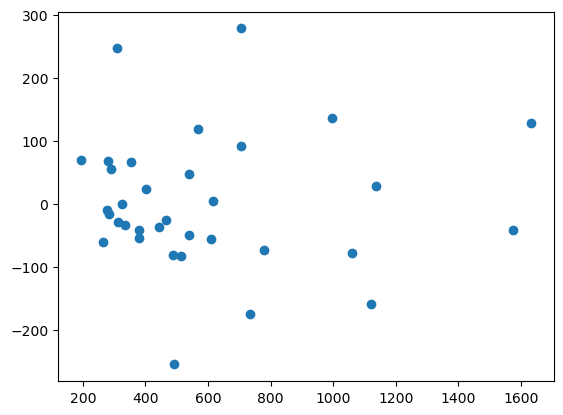

In [156]:
# Plot the residuals versus y_hat (to check wheather residuals are independent of each other)
plt.scatter(data1["Y_hat"], data1["residuals"])

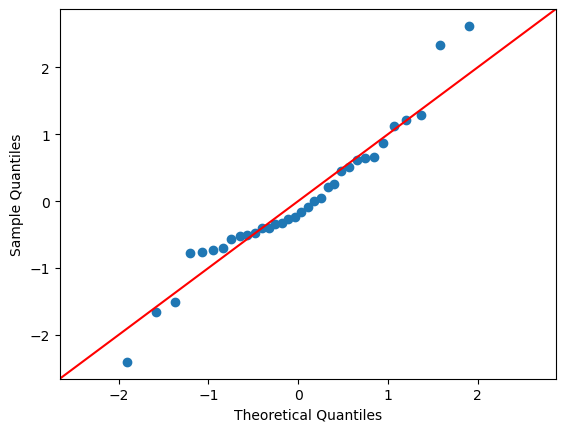

In [158]:
# Plot the Q-Q plot (to check the normality of residuals)
import statsmodels.api as sm
sm.qqplot(data1["residuals"], line='45', fit=True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

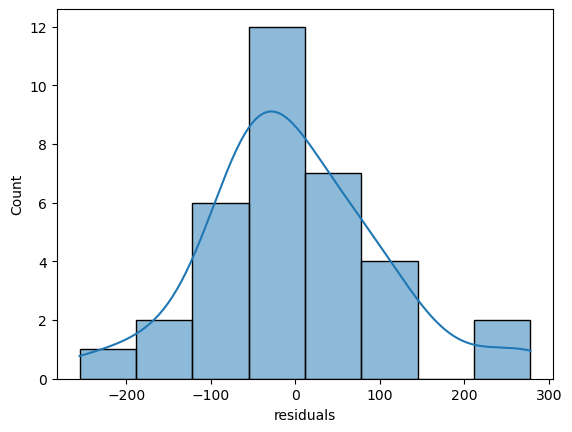

In [160]:
sns.histplot(data1["residuals"], kde =True)

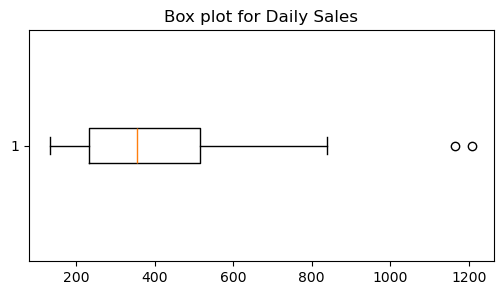

In [163]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"], vert = False)
plt.show()

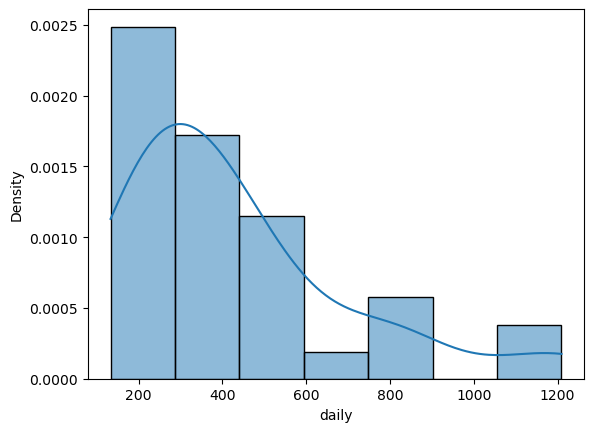

In [167]:
sns.histplot(data1['daily'], kde = True,stat='density',)
plt.show()

### Observations 

####. the daily column values appears to be right skewed

##.The sunday column values appears to be right skewwed

##.There are two outliers in both daily column and also in sunday column as observed from the boxplots

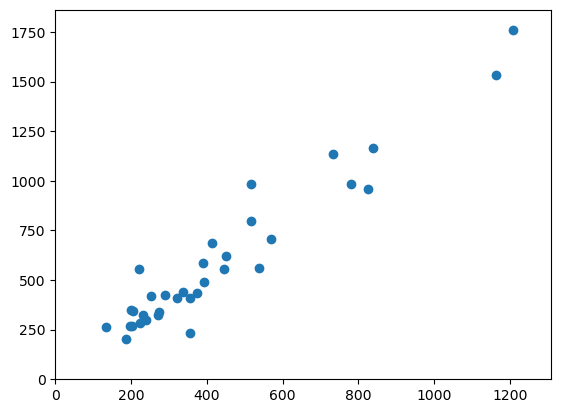

In [176]:
x= data1["daily"]
y= data1["sunday"]
plt.scatter(data1["daily"], data1["sunday"])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(y) + 100)
plt.show()

In [178]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [180]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [182]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()

In [184]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        10:24:55   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""